In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import psycopg2

%matplotlib inline  
%config InlineBackend.figure_format='retina'

In [2]:
## Function connects to Smunch DB and runs SQL querry returning a DataFrame
def run_sql_query(query):

    with open('../private/db_info.txt') as f:
        content = f.readlines()
    content = [x.strip('\n') for x in content]
    
    conn = psycopg2.connect(dbname=content[0], user=content[1], host=content[2],
                           port=content[3], password=content[4])
    
    df = pd.io.sql.read_sql_query(query, conn)
    return df

In [3]:
## Reading in noah tables
orders = run_sql_query("Select * from noah.orders")
meal_ingrds = run_sql_query("Select * from noah.meal_ingredients")
ingrds = run_sql_query("Select * from noah.ingredients")

In [4]:
orders.sample(2)

,cust_id,meal_id,meal_name,meal_rating
60469,0030N00002LQqF9QAL,a050N00000zZfyrQAC,"Grilled Stuffed Aubergine 'Betenjan Khudar',",NaN
31826,0030N00002jFfpRQAS,a050N000014ziDHQAY,Caprese Bagel with Pesto,NaN


In [5]:
meal_ingrds.sample(2)

,meal_id,ingredient_id
11974,a050N00001518bbQAA,a070N00001PJENqQAP
4455,a050N00000zZg4OQAS,a070N00001DLLeKQAX


In [6]:
ingrds.sample(2)

,ingredient_id,name
1334,a060N00002hDL8tQAG,Chickpea Salad
570,a060N00002XMfcVQAT,salmon ceviche


In [7]:
## Getting the inngredient ids
ig_ids = ingrds.ingredient_id.values

## Get the tot count of orders for every user
cust_order_count = pd.DataFrame(orders.groupby('cust_id')['meal_id'].count())
cust_order_count.columns = ['meal_count']
cust_order_count.sample(3)

,meal_count
cust_id,
0030N00002eWDDpQAO,17
0030N00002LQp6PQAT,94
0030N00002oRYQUQA4,9


In [33]:
cust_order_count.describe()

,meal_count
count,9838.000000
mean,26.111608
std,40.874406
min,1.000000
25%,3.000000
50%,10.000000
75%,30.000000
max,519.000000


In [51]:
meal_c = cust_order_count.meal_count.values
tot_p = 0
for i in range(1,10):
    c = (meal_c == i).sum()
    percent = c / len(meal_c)
    tot_p += percent
    print("{0:4d} of customer have ordered {1:2d} times. {2:2.2f}%".format(c, i, percent*100))
print("Make up {0:2.2f}% of total user base.".format(tot_p*100))

1374 of customer have ordered  1 times. 13.97%
 737 of customer have ordered  2 times. 7.49%
 578 of customer have ordered  3 times. 5.88%
 483 of customer have ordered  4 times. 4.91%
 395 of customer have ordered  5 times. 4.02%
 329 of customer have ordered  6 times. 3.34%
 251 of customer have ordered  7 times. 2.55%
 296 of customer have ordered  8 times. 3.01%
 244 of customer have ordered  9 times. 2.48%
Make up 47.64% of total user base.


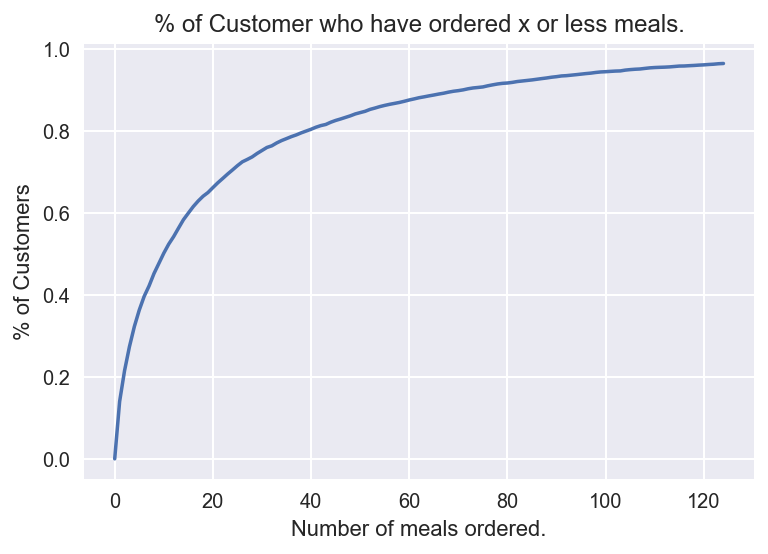

In [61]:
## Plot % ordered
tot_p = [(meal_c == 0).sum() / len(meal_c)]
for i in range(1,125):
    c = (meal_c == i).sum()
    percent = c / len(meal_c)
    tot_p.append(percent + tot_p[i-1])
    
plt.plot(np.arange(0,125), tot_p)
plt.title("% of Customer who have ordered x or less meals.")
plt.xlabel("Number of meals ordered.")
plt.ylabel("% of Customers")
plt.show()

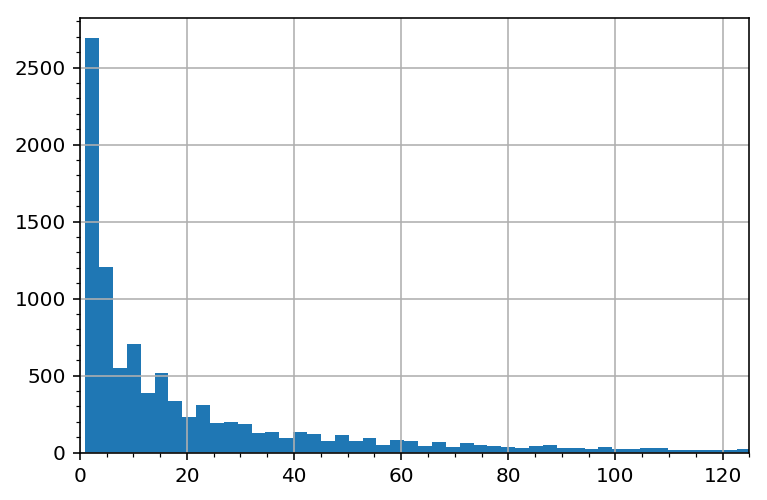

In [23]:
## Inspecting the breakdown of user order count
counts = cust_order_count.meal_count.values
plt.hist(counts, bins=200)
plt.xlim(0,125)
plt.grid()
plt.minorticks_on()
plt.show()

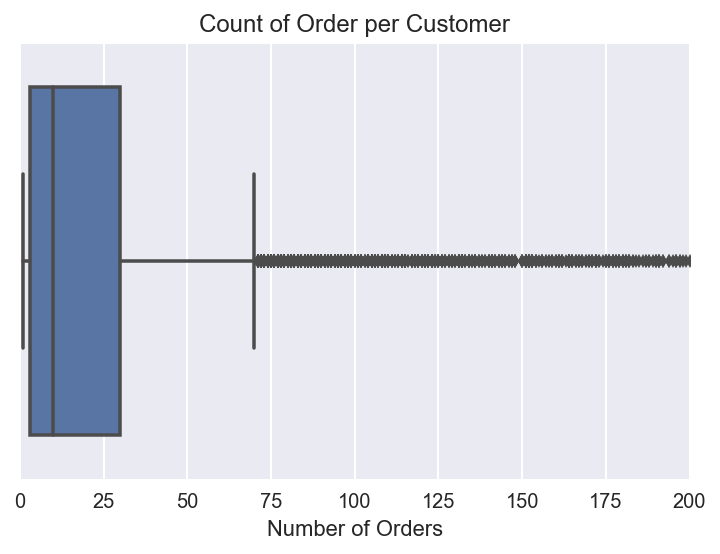

In [28]:
## Box plot of number of orders per customer
sns.boxplot(counts)
plt.xlim(0,200)
plt.xlabel('Number of Orders')
plt.title("Count of Order per Customer")

In [103]:
## Add on ingredient id cols with 0 for each user
## cust_id | meal_count | ing1 | ing2 | ing3 | ... | ingn
ing_frequency = cust_order_count
for ig in ig_ids:
    ing_frequency[ig] = 0
ing_frequency.sample(4)

,meal_count,a060N00002SBGVBQA5,a060N00002gML0pQAG,a060N00002SBNSAQA5,a060N00002SBNSPQA5,a060N00002gMKqdQAG,a060N00002SBGUoQAP,a060N00002eo72UQAQ,a060N00002XMfXTQA1,a060N00002TE1AaQAL,...,a060N00002hWTiNQAW,a060N00002hWTrOQAW,a060N00002hWZZaQAO,a060N00002hWZZfQAO,a060N00002hWZZkQAO,a060N00002hWZkxQAG,a060N00002hWZlMQAW,a060N00002hWdROQA0,a060N00002hWdV2QAK,a060N00002hW5sdQAC
cust_id,,,,,,,,,,,,,,,,,,,,,
0030N00002LQq4ZQAT,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0030N00002oRGn5QAG,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0030N00002Wx04qQAB,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0030N00002TZoQwQAL,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
